In [10]:
import kagglehub
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

csv_path = os.path.join(path, "ncr_ride_bookings.csv")
df = pd.read_csv(csv_path)

print(df.head())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

In [12]:
df.shape

(150000, 21)

In [14]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [16]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


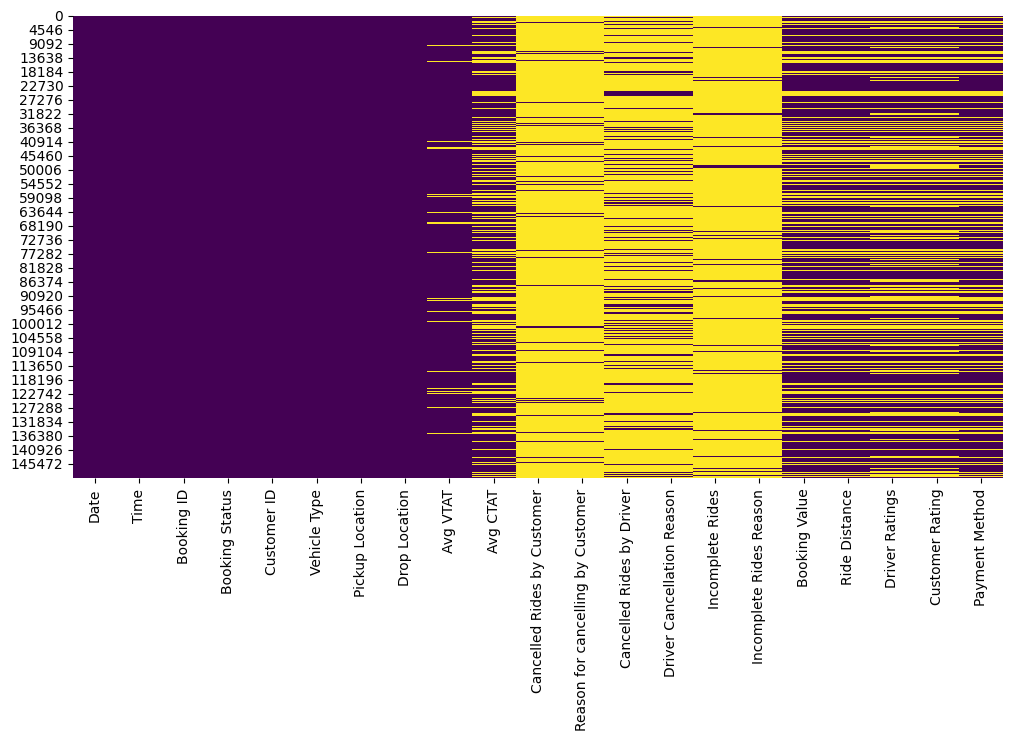

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [20]:
#unknown 

In [30]:
df['Cancelled Rides by Customer']=df['Cancelled Rides by Customer'].fillna(0)
df['Avg VTAT']=df['Avg VTAT'].fillna(df['Avg VTAT'].mean())
df=df.dropna(thresh=len(df)*0.5, axis=1)

In [32]:
df.isnull().sum()
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.0,Unknown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.8,Unknown,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.5,Unknown,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.6,Unknown,737.0,48.21,4.1,4.3,UPI


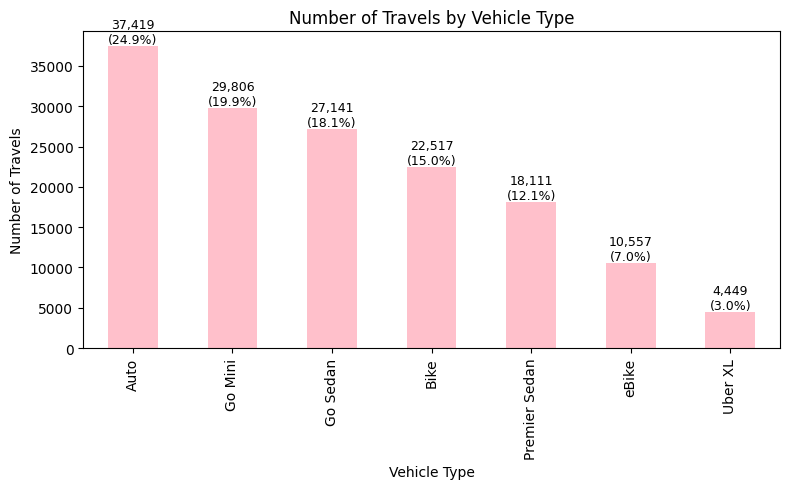

In [54]:
import matplotlib.pyplot as plt

counts = df['Vehicle Type'].value_counts().sort_values(ascending=False)
share = (counts / counts.sum() * 100).round(1)

ax = counts.plot(kind='bar', figsize=(8,5), color='pink')
ax.set_title('Number of Travels by Vehicle Type')
ax.set_xlabel('Vehicle Type'); ax.set_ylabel('Number of Travels')

for i, (v, p) in enumerate(zip(counts.values, share.values)):
    ax.text(i, v, f'{v:,}\n({p}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout(); plt.show()

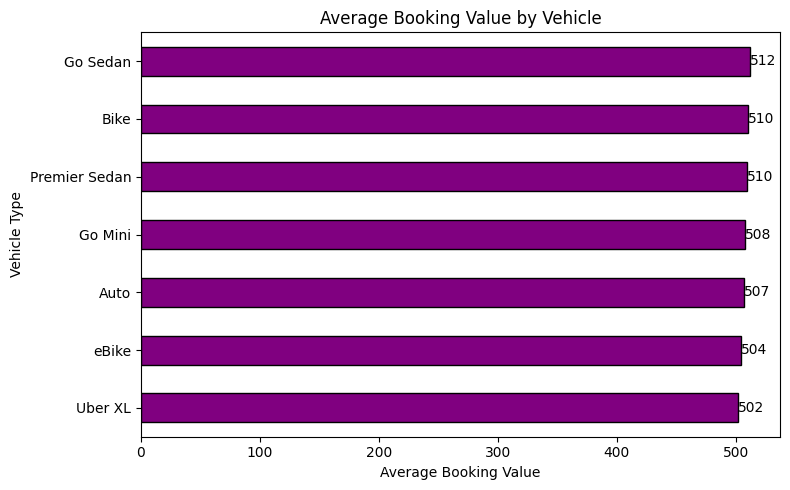

In [62]:
booking_means=df.groupby('Vehicle Type')['Booking Value'].mean().sort_values()
ax=booking_means.plot(kind='barh', figsize=(8,5), color='Purple', edgecolor='black')
ax.set_title('Average Booking Value by Vehicle')
ax.set_xlabel('Average Booking Value')
ax.set_ylabel('Vehicle Type')

for i, v in enumerate(booking_means.values):
    ax.text(v, i, f'{v:.0f}', va='center', ha='left')

plt.tight_layout()
plt.show()

Customer cancellations: 10500
Driver cancellations  : 37500
Difference            : 27000


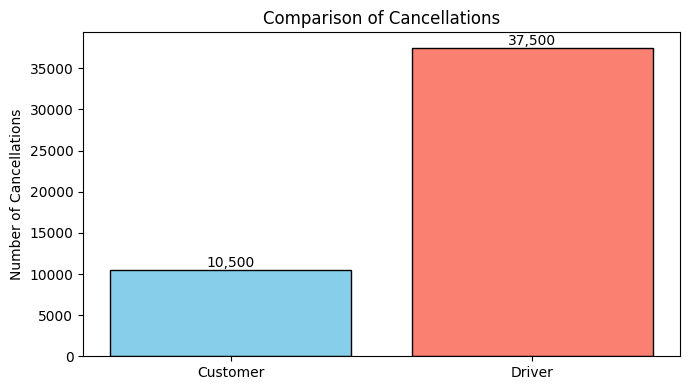

In [82]:
import re
import matplotlib.pyplot as plt
import pandas as pd

df.columns = df.columns.str.strip()


col_cust = 'Cancelled Rides by Customer'
col_driver_direct = 'Cancelled Rides by Driver'
col_driver_reason = 'Driver Cancellation Reason'
col_status = 'Booking Status'


if col_cust in df.columns:
    cust_series = pd.to_numeric(df[col_cust], errors='coerce').fillna(0).astype(int)
    cust_cancel = int(cust_series.sum())
else:
    cust_cancel = 0


if col_driver_direct in df.columns:

    driver_series = pd.to_numeric(df[col_driver_direct], errors='coerce').fillna(0).astype(int)
    driver_cancel = int(driver_series.sum())
elif col_driver_reason in df.columns:
    
    driver_cancel = int(df[col_driver_reason].notna().sum())
elif col_status in df.columns:
     
    status = df[col_status].astype(str).str.strip().str.lower()
    driver_like = [
        'driver cancelled', 'cancelled by driver', 'no driver found',
        'driver no show'
    ]
    
    pattern = re.compile('|'.join(map(re.escape, driver_like)))
    driver_cancel = int(status.str.contains(pattern, na=False).sum())
else:
    driver_cancel = 0


print('Customer cancellations:', cust_cancel)
print('Driver cancellations  :', driver_cancel)
print('Difference            :', abs(cust_cancel - driver_cancel))


plt.figure(figsize=(7,4))
plt.bar(['Customer','Driver'], [cust_cancel, driver_cancel], color=['skyblue','salmon'], edgecolor='black')
plt.title('Comparison of Cancellations')
plt.ylabel('Number of Cancellations')
for i, v in enumerate([cust_cancel, driver_cancel]):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [96]:
import pandas as pd

df_raw = pd.read_csv(csv_path)  
df_raw.columns = df_raw.columns.str.strip()

In [98]:
[c for c in df_raw.columns if 'reason' in c.lower() and 'customer' in c.lower()]

['Reason for cancelling by Customer']

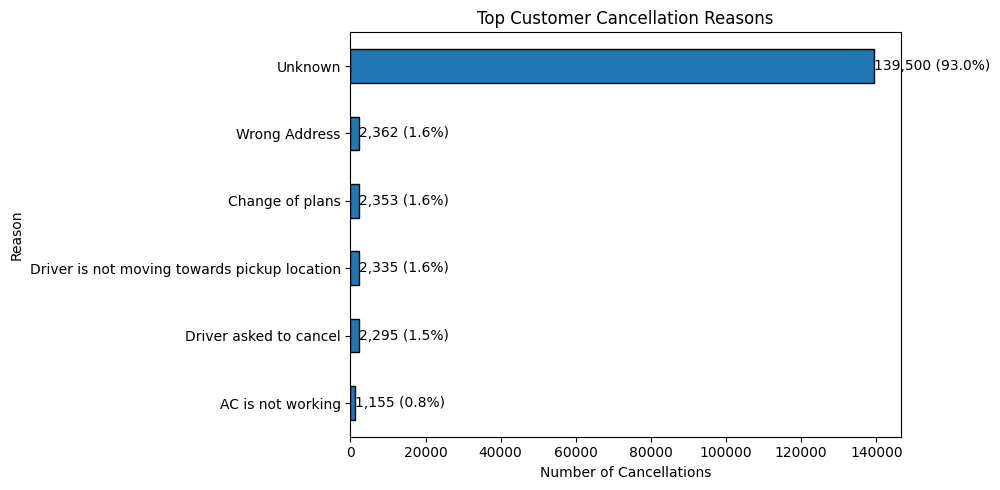

In [100]:
import matplotlib.pyplot as plt

col_reason_cust = 'Reason for cancelling by Customer'  

reasons = (
    df_raw[col_reason_cust]
      .astype(str).str.strip()
      .replace({'nan':'Unknown','None':'Unknown','':'Unknown'})
)

top = reasons.value_counts().head(12)

plt.figure(figsize=(10,5))
ax = top.sort_values().plot(kind='barh', edgecolor='black')
ax.set_title('Top Customer Cancellation Reasons')
ax.set_xlabel('Number of Cancellations'); ax.set_ylabel('Reason')

total = top.sum()
for y, v in enumerate(top.sort_values().values):
    ax.text(v, y, f'{v:,} ({100*v/total:.1f}%)', va='center')

plt.tight_layout(); plt.show()

In [104]:
import pandas as pd
df['Cancelled_by_Customer_Flag'] = df['Cancelled Rides by Customer'].apply(lambda x: 1 if x==1 else 0)

In [108]:
from sklearn.preprocessing import LabelEncoder

cat_cols=['Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method']
le=LabelEncoder()
for col in cat_cols:
    df[col]=df[col].astype(str)
    df[col]=le.fit_transform(df[col])

In [114]:
from sklearn.model_selection import train_test_split

x=df[['Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT',
      'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']]

y=df['Cancelled_by_Customer_Flag']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27900
           1       0.94      0.53      0.68      2100

    accuracy                           0.96     30000
   macro avg       0.96      0.76      0.83     30000
weighted avg       0.96      0.96      0.96     30000



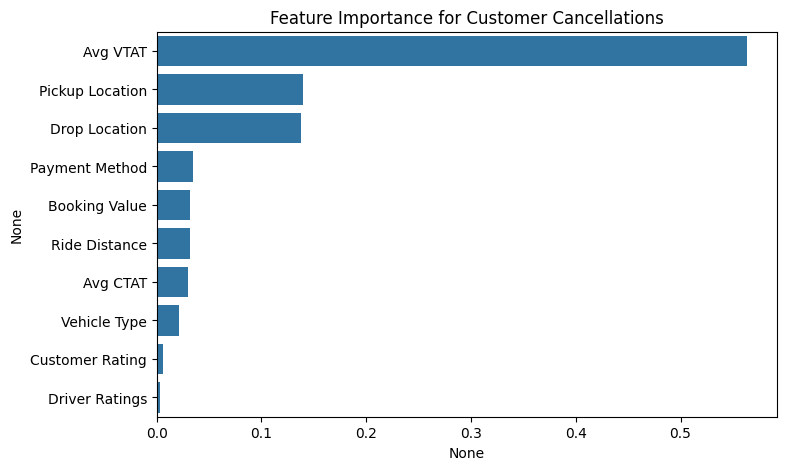

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance for Customer Cancellations")
plt.show()

In [ ]:
##Sogol Moniri

In [ ]:
In this project, we analyzed an Uber-like ride dataset to understand ride patterns and cancellations.
Our workflow included:
 1. Exploratory Data Analysis (EDA):
 • Checked the distribution of ride distances, booking values, and vehicle types.
 • Compared the number of cancellations made by customers vs drivers.
 • Investigated the top reasons provided for cancellations.
 2. Customer vs Driver Cancellations:
 • Customer cancellations were much higher than driver cancellations.
 • Most customer cancellation reasons were recorded as “Unknown”, followed by issues like wrong address or change of plans.
 3. Prediction Model:
 • Built a Random Forest Classifier to predict whether a customer would cancel a ride.
 • Achieved ~96% accuracy overall.
 • However, recall for the cancellation class was lower (53%), indicating class imbalance.
 4. Feature Importance Analysis:
 • The most influential factors for predicting cancellations were:
 • Average VTAT (Vehicle Turnaround Time)
 • Pickup Location
 • Drop Location
 • Payment Method

⸻

Key Findings
 • Auto rides were the most frequently booked vehicle type.
 • Customer cancellations dominate compared to driver cancellations.
 • Waiting time (VTAT) and pickup location are the strongest drivers of customer cancellations.